Grouped Bar Charts
==================
This notebook introduces the methods of creating bar charts from our data, including some of the key concepts of our plotting package, `matplotlib`. Bar charts are useful for making comparisons between close data because we are very good at evaluating the size of rectangles.

Topics covered:

- bar charts
- styling charts (titles, labels, size, color, etc)
- grouped bar charts
- new `school_data` package for custom code


In [1]:
import matplotlib.pyplot as plt
from nycschools import schools, ui, nysed

df = schools.load_school_demographics()


Grouped Bar Chart: Citywide student demographics
------------------------------------------------------------------------
Drawing from the counts of students in different
demographic categories (`asian_n`, `ell_n`) we will draw a basic bar chart.

### `melt()` to un-pivot data
The first thing we do is **melt** the columns with the demographic counts
into a single column. Typically, a melt will create two new columns:
one with the categories or `id` labels for the row, and a second with
the `values` for the row. In this example we create **enroll_cat** (`id`)
to tell us which _category_ of enrollment number we're looking at
and **enrollment** (`values`) to hold the number of students for that row for
that category. Each row in this dataframe reports the observation
for a specicif school, grade, academic year (`dbn`, `grade`, `year`).


In [13]:
tests = nysed.load_nyc_nysed()
tests = tests.drop(columns=["school_name", "total_enrollment"])
data = df.merge(tests, on=["beds","ay"], how="inner")
a = set(df.columns)
b = set(tests.columns)
c = a.intersection(b)
data.columns

Index(['dbn', 'beds', 'district', 'geo_district', 'boro', 'school_name',
       'short_name', 'ay', 'year', 'total_enrollment',
       'grade_3k_pk_half_day_full', 'grade_k', 'grade_1', 'grade_2', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'female_n', 'female_pct', 'male_n',
       'male_pct', 'asian_n', 'asian_pct', 'black_n', 'black_pct',
       'hispanic_n', 'hispanic_pct', 'multi_racial_n', 'multi_racial_pct',
       'native_american_n', 'native_american_pct', 'white_n', 'white_pct',
       'missing_race_ethnicity_data_n', 'missing_race_ethnicity_data_pct',
       'swd_n', 'swd_pct', 'ell_n', 'ell_pct', 'poverty_n', 'poverty_pct',
       'eni_pct', 'clean_name', 'zip', 'index', 'category', 'exam', 'grade',
       'test_year', 'number_tested', 'number_not_tested', 'level_1_n',
       'level_1_pct', 'level_2_n', 'level_2_pct', 'level_3_n', 'level_3_pct',
       'level_4_n', 'level_4_pct', 'level_3_4_p

In [14]:

# work with just one year to make things clearer
totals = data[tdatatals["ay"] == 2020]


# define the category columns -- the columns which will be "melted" / collapsed
cats = ["total_enrollment", "asian_n", "black_n","hispanic_n","white_n"]

# the columns that will be the same after the melt
id_cols = ["dbn", "district", "boro"]

# get just the cols we want from the df
totals = totals[id_cols + cats]

# make nice names for our columns by dropping the _n and renaming total_enrollment to "all students"
# these column headers will become the data in the enroll_cat column after the melt
cats = ["all students", "asian", "black", "hispanic","white"]
totals.columns = id_cols + cats

totals

NameError: name 'tdatatals' is not defined

In [ ]:
# melt tutorial:
# https://www.educba.com/pandas-melt/
data = pd.melt(totals, id_vars=id_cols, value_vars=cats, var_name="enroll_cat", value_name="enrollment")


# let's look at one grade for one school for one year (2019) to see what ouplt.style.use('fivethirtyeight')r data looks like
data.query("dbn == '01M015'")

,dbn,district,boro,enroll_cat,enrollment
0,01M015,1,Manhattan,all students,193
1878,01M015,1,Manhattan,asian,26
3756,01M015,1,Manhattan,black,53
5634,01M015,1,Manhattan,hispanic,102
7512,01M015,1,Manhattan,white,11


In [ ]:
# use groupby and agg to get the city wide enrollment data
city_enroll = data[["enroll_cat", "enrollment"]].groupby("enroll_cat", as_index=False).agg(sum)

city_enroll

,enroll_cat,enrollment
0,all students,1050017
1,asian,173758
2,black,261595
3,hispanic,432188
4,white,151060


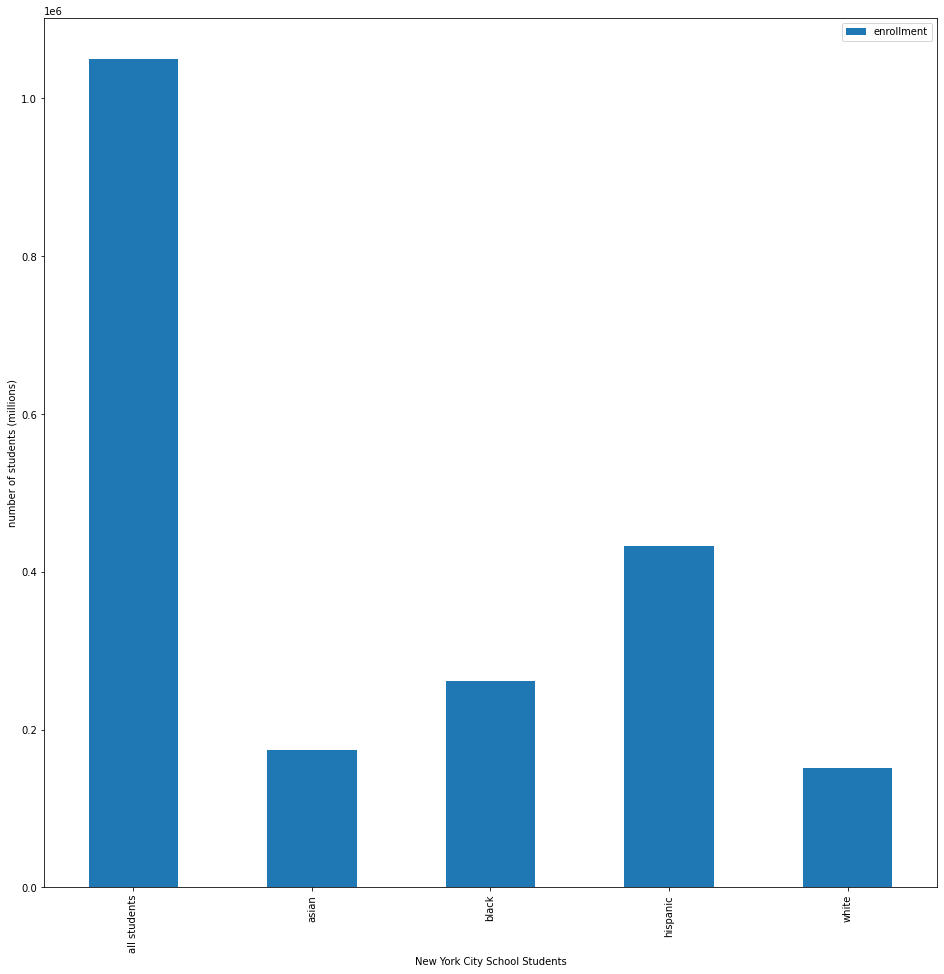

In [ ]:
# create a bar chart of new york city student population
# the size is set in inches (don't think it's pixels or else it takes a long time to run)
# to see the full size image, right click and view image

ax = city_enroll.plot(x="enroll_cat", y=["enrollment"], kind="bar", figsize=(16, 16))

ax.set_xlabel("New York City School Students")

# Set the y-axis label
ax.set_ylabel("number of students (millions)")
pass # pass so only the chartdisplays with no other output

Grouped Bar Chart: student demographics by district
-----------------------------------------------------------------------------
Now we'll make a more complicated bar chart, where we display the
ethnic group populations at the district leve. For this chart
we will have 20 bars (4 groups x 5 boroughs). We use more of the
functions in `matplot` to style our ouput, add titls and legends, etc.

Links:

- [Python Charts: Grouped Bar Charts with Labels in Matplotlib ](https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/)
- [Matplotlib: Legend Demo](https://matplotlib.org/stable/gallery/text_labels_and_annotations/legend_demo.html)
- [Seaborn: set_context()](https://seaborn.pydata.org/generated/seaborn.set_context.html)

In [ ]:
# now group them by district
boro_enroll = data[["boro", "enroll_cat", "enrollment"]].groupby(["boro", "enroll_cat"], as_index=False).agg(sum)
ui.fmt_table(boro_enroll, num_cols=["enrollment"], col_map={"enroll_cat":"student group"})


,boro,student group,enrollment
0,Bronx,all students,"218,081"
1,Bronx,asian,"11,006"
2,Bronx,black,"58,362"
3,Bronx,hispanic,"136,098"
4,Bronx,white,"8,934"
5,Brooklyn,all students,"315,797"
6,Brooklyn,asian,"53,857"
7,Brooklyn,black,"108,445"
8,Brooklyn,hispanic,"90,867"
9,Brooklyn,white,"54,185"


In [ ]:
# create a df for each group we want to plot
asian = boro_enroll.query("enroll_cat == 'asian'")
black = boro_enroll.query("enroll_cat == 'black'")
hispanic = boro_enroll.query("enroll_cat == 'hispanic'")
white = boro_enroll.query("enroll_cat == 'white'")

# get the tick marks for the x access
x = np.arange(len(df.boro.unique()))

# instead of plotting the dataframe, get the figure and axis components from the plot
fig, ax = plt.subplots(figsize=(16, 9))

# the bar width in inches
w = .17

# add the bars
ax.bar(x + w, hispanic["enrollment"], width=w, label="Hispanic")
ax.bar(x + w * 2, black["enrollment"], width=w, label="Black")
ax.bar(x + w * 3, white["enrollment"], width=w, label="White")
ax.bar(x + w * 4, asian["enrollment"], width=w, label="Asian")

# set the x-ticks to the middle of the bar groups and add labels
ax.set_xticks(x + (w * 5) / 2)
ax.set_xticklabels(boro_enroll.boro.unique())


# style the output
sns.set_context('talk')
# sns.set_context('poster')
# sns.set_context('paper')
# sns.set_context('notebook')

# Set the y-axis label
ax.set_ylabel("Number of students", labelpad=15)

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#efefef')
ax.xaxis.grid(False)


ax.legend()
fig.tight_layout()
ax.set_title('New York City School Enrollment by Borough', pad=40)

pass

NameError: name 'boro_enroll' is not defined